<a href="https://colab.research.google.com/github/PaulGeorge124/CSST102-3B/blob/main/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1: Data Exploration and Preprocessing

**1,Load and Explore the Data:v**

In [9]:
import pandas as pd
import numpy as np


data = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

numeric_data = data.select_dtypes(include=[np.number])


variances = numeric_data.var()

print(variances.sort_values(ascending=False))


id                         1.563015e+16
area_worst                 3.241674e+05
area_mean                  1.238436e+05
area_se                    2.069432e+03
perimeter_worst            1.129131e+03
perimeter_mean             5.904405e+02
texture_worst              3.777648e+01
radius_worst               2.336022e+01
texture_mean               1.849891e+01
radius_mean                1.241892e+01
perimeter_se               4.087896e+00
texture_se                 3.043159e-01
radius_se                  7.690235e-02
concavity_worst            4.352409e-02
compactness_worst          2.475477e-02
concavity_mean             6.355248e-03
concave points_worst       4.320741e-03
symmetry_worst             3.827584e-03
compactness_mean           2.789187e-03
concave points_mean        1.505661e-03
concavity_se               9.111982e-04
symmetry_mean              7.515428e-04
smoothness_worst           5.213198e-04
fractal_dimension_worst    3.262094e-04
compactness_se             3.207029e-04


In [2]:
import pandas as pd
data = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')
print(data.head(10))


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

In [3]:
print(data.isnull().sum())


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
print(data.describe())
print(data.shape)


                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [10]:
numeric_data = data.select_dtypes(include=[np.number])
variances = numeric_data.var()
print(variances.sort_values(ascending=False))


id                         1.563015e+16
area_worst                 3.241674e+05
area_mean                  1.238436e+05
area_se                    2.069432e+03
perimeter_worst            1.129131e+03
perimeter_mean             5.904405e+02
texture_worst              3.777648e+01
radius_worst               2.336022e+01
texture_mean               1.849891e+01
radius_mean                1.241892e+01
perimeter_se               4.087896e+00
texture_se                 3.043159e-01
radius_se                  7.690235e-02
concavity_worst            4.352409e-02
compactness_worst          2.475477e-02
concavity_mean             6.355248e-03
concave points_worst       4.320741e-03
symmetry_worst             3.827584e-03
compactness_mean           2.789187e-03
concave points_mean        1.505661e-03
concavity_se               9.111982e-04
symmetry_mean              7.515428e-04
smoothness_worst           5.213198e-04
fractal_dimension_worst    3.262094e-04
compactness_se             3.207029e-04


**2,Preprocessing**

In [11]:
data = data.drop(columns=['id', 'Unnamed: 32'])


In [12]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = data.drop(columns=['diagnosis'])
features_scaled = scaler.fit_transform(features)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['diagnosis'], test_size=0.2, random_state=42)


# **Exercise 2: Implementing KNN Model**

**1,KNN Classifier Implementation:**







In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy:', accuracy_score(y_test, predictions))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions))


Accuracy: 0.9473684210526315
Confusion Matrix:
 [[68  3]
 [ 3 40]]


**2,Experiment with different values of n_neighbors:**

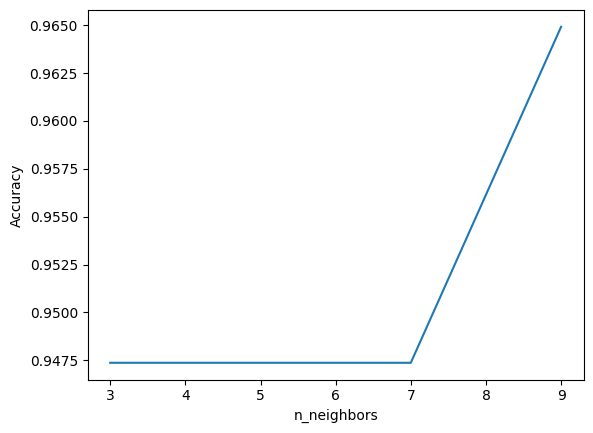

In [21]:
import matplotlib.pyplot as plt
neighbors = [3, 5, 7, 9]
accuracies = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

plt.plot(neighbors, accuracies)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


# **Exercise 3: Implementing Logistic Regression**

**1,Logistic Regression Implementation**

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)


In [23]:
from sklearn.metrics import classification_report
print('Accuracy:', accuracy_score(y_test, lr_predictions))
print('Confusion Matrix:\n', confusion_matrix(y_test, lr_predictions))
print('Classification Report:\n', classification_report(y_test, lr_predictions))


Accuracy: 0.9736842105263158
Confusion Matrix:
 [[70  1]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**2,Comparison of KNN and Logistic Regression:**

In [25]:
from sklearn.metrics import classification_report, accuracy_score
knn_predictions = knn.predict(X_test)
lr_predictions = lr.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"KNN Accuracy: {knn_accuracy}")
print(f"Logistic Regression Accuracy: {lr_accuracy}")

print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))


KNN Accuracy: 0.9649122807017544
Logistic Regression Accuracy: 0.9736842105263158
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# **Exercise 4: Hyperparameter Tuning and Cross-Validation**

**1,Grid Search for KNN**

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best Params:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)


Best Params: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best Score: 0.9648351648351647


**2,Cross-Validation for Logistic Regression:**

In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), features_scaled, data['diagnosis'], cv=5)
print('Cross-validated accuracy:', scores.mean())


Cross-validated accuracy: 0.9806862288464524


# **Exercise 5: Decision Boundary Visualization**

**1,Reduce Dimensionality with PCA:**

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


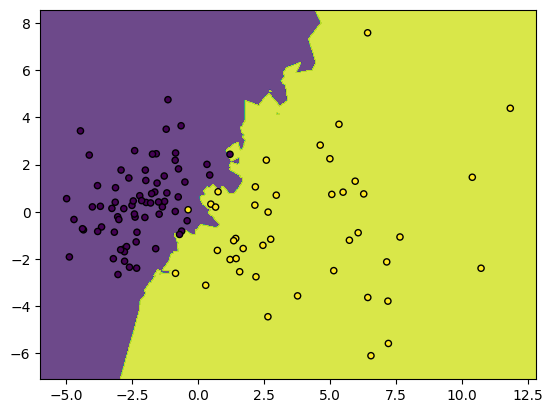

In [29]:
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
    plt.show()

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
plot_decision_boundary(X_test_pca, y_test, knn_pca)
